<div class="span5 alert alert-info">
<h1>Stock Market Price Prediction with New Data</h1>

<p><b>Breif Overview:</b> 
    <br/><br/>
The model created below is for prediction the stock prices of a Company.
<br/>
There are two datasets
<br/><br/>
1. Stock Prices Dataset for Dow Jones Inc
<br/><br/>
2. Top 25 headlines for everyday for the past 8 years
<br/><br/>
The notebook is briefly summarized as follows:
<br/><br/>
1. Data Preparation - Preparing data for evaluation.
<br/><br/>
2. Data Quality Checks - Performing basic checks on data for better understanding of data.
<br/><br/>
3. Feature inspection and filtering - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.
<br/><br/>
4. Feature importance ranking via learning models
<br/><br/>
5. Training - training data against multiple machine learning algorthms and fine tuning a couple of algorithms for accuracy
    <br/>
</p> </div>

In [1]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot
#from pandas import read_csv, set_option
from pandas import Series, datetime
from pandas.tools.plotting import scatter_matrix, autocorrelation_plot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from xgboost import XGBClassifier
import seaborn as sns

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<div class="span5 alert alert-info">
<h3>1. Data Preparation:</h3>
<br/>
Imported all the necessary modules for the project
<br/><br/>
Loaded the dataset as a dataframe and parsed the date column to be read by the dataframe as dates type
Checked the top 5 rows of the dataframe to see how the columns are aligned.
<br/><br/>
The 'combined_stock_data.csv' initially only had the headlines(Top1 through Top25). Each row was iterated over an algorithm which generated the Subjectivity, Objectivity, Positive, Negative, Neutral sentiments of the respective headlines of each row.
<br/><br/>
The algorithm was accepting only a single sentence and was providing the respective sentiments in percentage. I modified the algorithm iterate over all of the individuals rows and simultaneously create the Subjectivity, Objectivity, Negative, Positive, Neutral values and assign itself to the columns in the dataframe.
<br/><br/>
The headlines Top1 through Top25 were concatenated and then passed on to the algorithm
<br/><br/>
The original algorithm : https://github.com/nik0spapp/usent
<br/><br/>
Modified algorithm : https://github.com/ShreyamsJain/Stock-Price-Prediction-Model/blob/master/Sentence_Polarity/sentiment.py
<br/>
</p>
</div>

In [2]:
# Loading the dataset to a dataframe
sentence_file = "../input/headlinespolarity/combined_stock_data.csv"
sentence_df = pd.read_csv(sentence_file, parse_dates=[1])

In [3]:
sentence_df.head()

,Unnamed: 0,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,...,Top22,Top23,Top24,Top25,Para,Subjectivity,Objectivity,Positive,Neutral,Negative
0,0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou...",75.000000,25.000000,18.750000,25.000000,56.250000
1,1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...,83.333333,16.666667,41.666667,16.666667,41.666667
2,2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...,56.250000,43.750000,18.750000,43.750000,37.500000
3,3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...,38.461538,61.538462,15.384615,61.538462,23.076923
4,4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,b'All the experts admit that we should legalis...,45.454545,54.545455,36.363636,54.545455,9.090909


<div class="span5 alert alert-info">
<p>
Checked the datatypes of all of the columns. Below is the list of data types
<p>
</div>

In [4]:
# Check the shape and data types of the dataframe
print(sentence_df.shape)
print(sentence_df.dtypes)

(1989, 34)
Unnamed: 0               int64
Date            datetime64[ns]
Label                    int64
Top1                    object
Top2                    object
Top3                    object
Top4                    object
Top5                    object
Top6                    object
Top7                    object
Top8                    object
Top9                    object
Top10                   object
Top11                   object
Top12                   object
Top13                   object
Top14                   object
Top15                   object
Top16                   object
Top17                   object
Top18                   object
Top19                   object
Top20                   object
Top21                   object
Top22                   object
Top23                   object
Top24                   object
Top25                   object
Para                    object
Subjectivity           float64
Objectivity            float64
Positive               float

<div class="span5 alert alert-info">
<p>
Load the Dow Jones dataset to a dataframe stock_data which contains 8 years of Stock Price data.
<br/><br/>
Parse the date as a date type and check the top 5 rows of the dataframe.
<br/><br/>
Checked the top 5 rows of the dataframe
</p>
</div>

In [5]:
# Load the stock prices dataset into a dataframe and check the top 5 rows
stock_prices = "../input/stocknews/DJIA_table.csv"
stock_data = pd.read_csv(stock_prices, parse_dates=[0])
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


<div class="span5 alert alert-info">
<p>
Checked the shape and datatypes of the loaded dataset
</p>
</div>

In [6]:
# Check the shape and datatypes of the stock prices dataframe
print(stock_data.shape)
print(stock_data.dtypes)

(1989, 7)
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


<div class="span5 alert alert-info">
<p>
Merged the 5 columns(Subjectivity, Objectivity, Positive, Negative, Neutral) with the stock_data dataframe.
<br/><br/>
Validated the merged dataframe to see the 2 dataframes are concatenated by checking the top 5 rows of the merged_dataframe.
</p>
</div> 

In [7]:
# Create a dataframe by merging the headlines and the stock prices dataframe
merged_dataframe = sentence_df[['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']].merge(stock_data, how='inner', on='Date', left_index=True)
# Check the shape and top 5 rows of the merged dataframe
print(merged_dataframe.shape)
merged_dataframe.head()

(1989, 13)


,Date,Label,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,0,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,1,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,0,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,0,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,1,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


<div class="span5 alert alert-info">
<p>
We have the Label(i.e the output column) column in the 2nd position.
<br/><br/>
Lets move it to the end of the dataframe to have a clear view of inputs and outputs
</p>
</div>

In [8]:
# Push the Label column to the end of the dataframe
cols = list(merged_dataframe)
print(cols)
cols.append(cols.pop(cols.index('Label')))
merged_dataframe = merged_dataframe.ix[:, cols]
merged_dataframe.head()

['Date', 'Label', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
1988,2008-08-08,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0
1987,2008-08-11,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1
1986,2008-08-12,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0
1985,2008-08-13,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0
1984,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,1


<div class="span5 alert alert-info">
<p>
We have the volumn column in Integer format. Lets change it to float, same as the rest of the columns so we do not have any difficulties in making calculations at a later point.
</p>
</div>

In [9]:
# Change the datatype of the volume column to float
#merged_dataframe['Date'] = pd.to_datetime(merged_dataframe['Date'])
merged_dataframe['Volume'] = merged_dataframe['Volume'].astype(float)
print(cols)
#merged_dataframe = merged_dataframe.set_index(['Date'])
merged_dataframe.index = merged_dataframe.index.sort_values()
merged_dataframe.head()

['Date', 'Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'Label']


,Date,Subjectivity,Objectivity,Positive,Negative,Neutral,Open,High,Low,Close,Volume,Adj Close,Label
0,2008-08-08,75.000000,25.000000,18.750000,56.250000,25.000000,11432.089844,11759.959961,11388.040039,11734.320312,212830000.0,11734.320312,0
1,2008-08-11,83.333333,16.666667,41.666667,41.666667,16.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000.0,11782.349609,1
2,2008-08-12,56.250000,43.750000,18.750000,37.500000,43.750000,11781.700195,11782.349609,11601.519531,11642.469727,173590000.0,11642.469727,0
3,2008-08-13,38.461538,61.538462,15.384615,23.076923,61.538462,11632.809570,11633.780273,11453.339844,11532.959961,182550000.0,11532.959961,0
4,2008-08-14,45.454545,54.545455,36.363636,9.090909,54.545455,11532.070312,11718.280273,11450.889648,11615.929688,159790000.0,11615.929688,1


<div class="span5 alert alert-info">
<p>
<h3>2. Data Quality Checks:</h3>
<br/>
Checked the statistics of individual columns in the dataframe.
<br/><br/>
As you can see below there are no outliers in any of the columns, however, some of the columns have NaN values
</p>
</div>

In [10]:
# Check the statistics of the columns of the merged dataframe and check for outliers
print(merged_dataframe.describe())

       Subjectivity  Objectivity     Positive     Negative      Neutral  \
count   1986.000000  1986.000000  1986.000000  1986.000000  1986.000000   
mean      56.712522    43.287478    19.966718    36.745804    43.287478   
std       21.557927    21.557927    16.373424    21.109970    21.557927   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%       40.000000    28.571429     8.333333    21.859903    28.571429   
50%       54.545455    45.454545    18.181818    33.333333    45.454545   
75%       71.428571    60.000000    28.571429    50.000000    60.000000   
max      100.000000   100.000000   100.000000   100.000000   100.000000   

               Open          High           Low         Close        Volume  \
count   1989.000000   1989.000000   1989.000000   1989.000000  1.989000e+03   
mean   13459.116048  13541.303173  13372.931728  13463.032255  1.628110e+08   
std     3143.281634   3136.271725   3150.420934   3144.006996  9.392343e+07   
min     

<div class="span5 alert alert-info">
<p>
Plotted histograms for individual columns to see the distribution of values.
<br/><br/>
The x axis is the column values and the y axis is the frequency of those values.
</p>
</div>

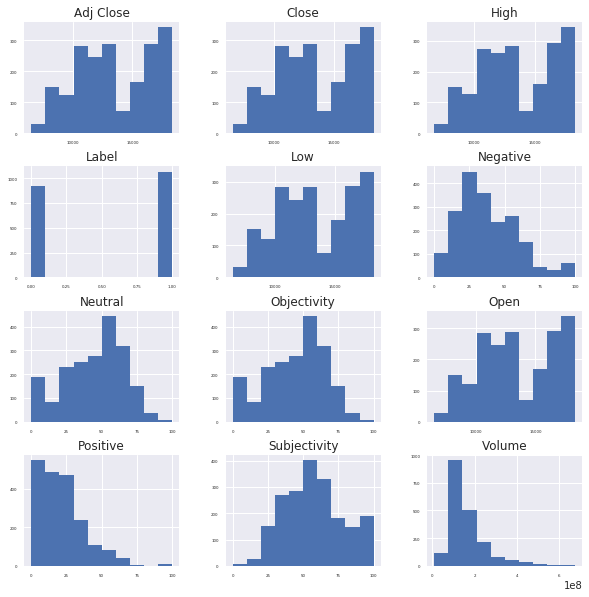

In [11]:
# Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
merged_dataframe.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
pyplot.show()

<div class="span5 alert alert-info">
<p>
Plot 1: Scatter plot of Stock Prices vs the Subjectivity.<br/>
        Stock Value of 0 means the Stock Value reduced since the previous day.<br/>
        Stock Value of 1 means the Stock Value increased or remained the same since the previous day.
<br/>        
Plot 2: Scatter plot of Stock Prices vs the Objectivity.<br/>
        Stock Value of 0 means the Stock Value reduced since the previous day.<br/>
        Stock Value of 1 means the Stock Value increased or remained the same since the previous day.
<br/>                
Plot 3: Histogram of Subjectivity column.<br/>
        The x axis are the values of Subjectivity and y axis is its respective frequency.<br/>
        The plot seems to be normally distributed.
<br/>       
Plot 4: Histogram of Objectivity column.<br/>
        The x axis are the values of Objectivity and y axis is its respective frequency.<br/>
        The plot seems to be normally distributed.<br/>
    </p></div>

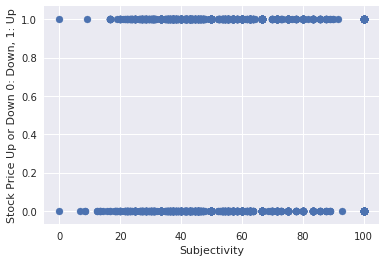

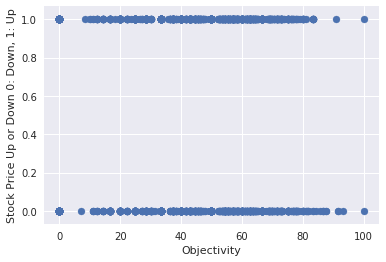

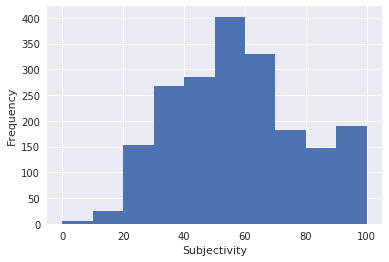

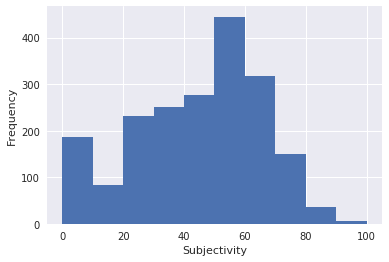

Size of the Labels column
Label
0     924
1    1065
dtype: int64


In [12]:
pyplot.scatter(merged_dataframe['Subjectivity'], merged_dataframe['Label'])
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Stock Price Up or Down 0: Down, 1: Up')
pyplot.show()
pyplot.scatter(merged_dataframe['Objectivity'], merged_dataframe['Label'])
pyplot.xlabel('Objectivity')
pyplot.ylabel('Stock Price Up or Down 0: Down, 1: Up')
pyplot.show()
merged_dataframe['Subjectivity'].plot('hist')
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Frequency')
pyplot.show()
merged_dataframe['Objectivity'].plot('hist')
pyplot.xlabel('Subjectivity')
pyplot.ylabel('Frequency')
pyplot.show()
print("Size of the Labels column")
print(merged_dataframe.groupby('Label').size())

<div class="span5 alert alert-info"><p>
<h3>3.Feature inspection and filtering</h3>
<br/>
Lets check for NaN values in individual columns of the dataframe.
</p>
</div>

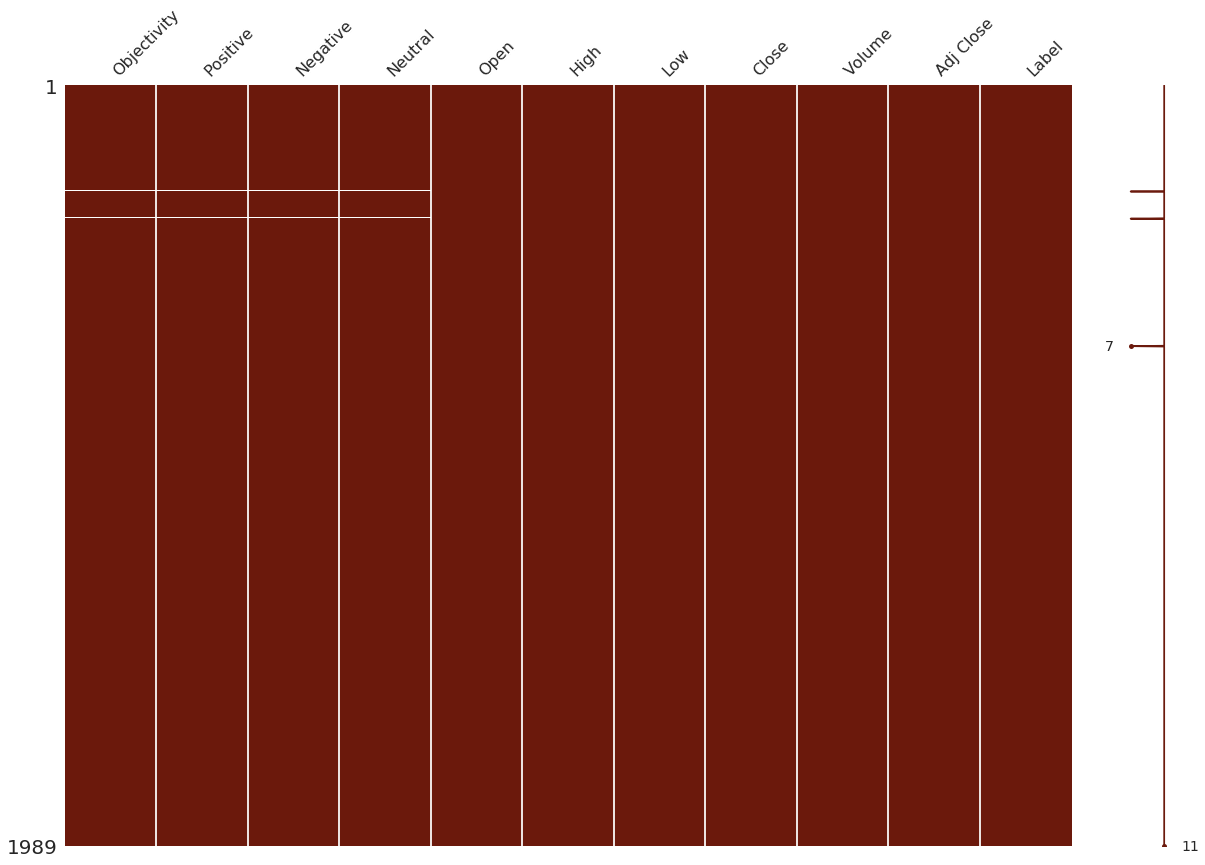

In [13]:
md_copy = merged_dataframe
md_copy = md_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=md_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

<div class="span5 alert alert-info">
<p>
<h4>Correlation Map for features:</h4>
<br/>
Now, we will plot a heat map and a scatter matrix to see the correlation of the columns with each other.
<br/><br/>
You can see the heat map with pearson correlation values in the plot below.
<br/><br/>
This gave me a better understanding to see if there are any dependant variables or if any of the variables are highly correlated.
<br/><br/>
Some variables Subjectivity, Objectivity are negatively correlated. There are very few variables which seem to have a very high correlation. Thus, at this point we can conclude that we do not need any sort of dimensionality reduction technique to be applied.
</p>
</div>

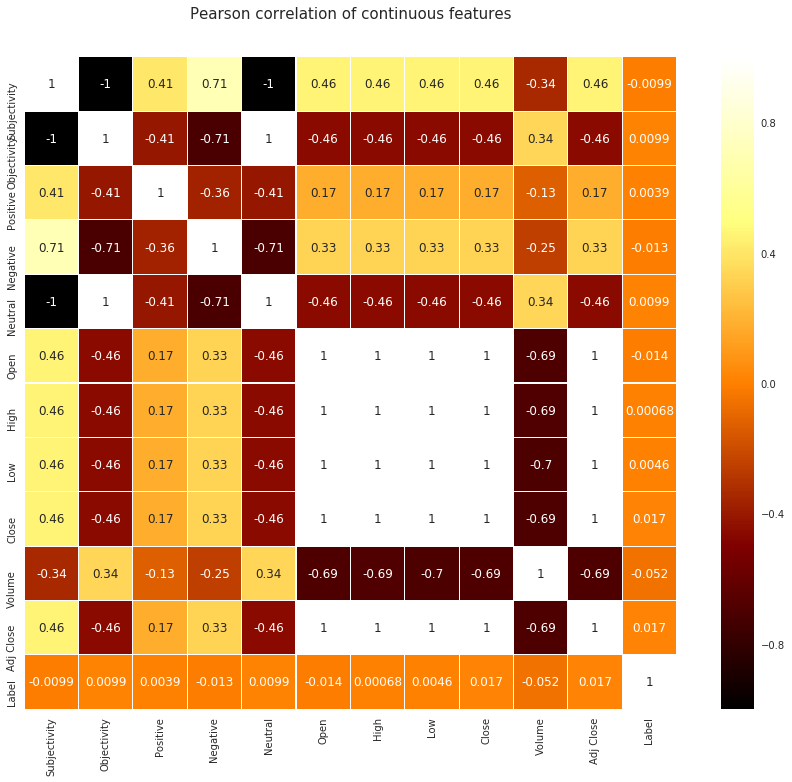

In [14]:
colormap = pyplot.cm.afmhot
pyplot.figure(figsize=(16,12))
pyplot.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(merged_dataframe.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)
pyplot.show()

In [15]:
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

bin_col = merged_dataframe.columns
zero_list = []
one_list = []
for col in bin_col:
    zero_count = 0
    one_count = 0
    for ix, val in merged_dataframe[col].iteritems():
        if merged_dataframe.loc[ix, 'Label'] == 0:
            zero_count += 1
        else:
            one_count += 1
    zero_list.append(zero_count)
    one_list.append(one_count)
    
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

<div class="span5 alert alert-info">
<p>
<h3>4. Training</h3>
<br/>
Recheck the dataframe to see if the dataset is ready for train.
<br/><br/>
There are certain NaN values in many columns of the dataframe.
<br/><br/>
Replace the NaN values with the mean values of the respective column.
<br/><br/>
Split the merged dataframe to inputs(X) and outputs(y)
<br/><br/>
In our dataset, we have columns Subjectivity through Adj Close as inputs and the Label column output.
<br/><br/>
Now, we will split our dataset to training and test samples. Lets train out model on first 80% of the data 
and test our prediction model on remaining 20% of the data.
<br/><br/>
As this is a time series, it is important we do not randomly pick training and testing samples.
<br/><br/>
Lets consider a few machine learning algorithms to perform our training on.
Logistic Regression
Linear Discriminant Analysis
K Nearest Neighbors
Decision trees
Naive Bayes
Support Vector Classifier
Random Forest Classifier
<br/><br/>
Lets add all of these classifiers to a list 'models'
<br/><br/>
After splitting the dataset, we can see that there are 1393 samples for training and 597 samples for testing
</p>
</div>

Date            datetime64[ns]
Subjectivity           float64
Objectivity            float64
Positive               float64
Negative               float64
Neutral                float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Adj Close              float64
Label                    int64
dtype: object
Date            1989
Subjectivity    1986
Objectivity     1986
Positive        1986
Negative        1986
Neutral         1986
Open            1989
High            1989
Low             1989
Close           1989
Volume          1989
Adj Close       1989
Label           1989
dtype: int64
Date            1989
Subjectivity    1989
Objectivity     1989
Positive        1989
Negative        1989
Neutral         1989
Open            1989
High            1989
Low             1989
Close           1989
Volume          1989
Adj Close       1989
Label           1989
dtype: int64
1989
1392
O

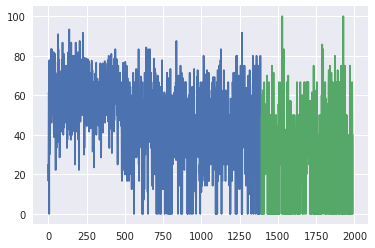

In [16]:
# Print the datatypes and count of the dataframe
print(merged_dataframe.dtypes)
print(merged_dataframe.count())
# Change the NaN values to the mean value of that column
nan_list = ['Subjectivity', 'Objectivity', 'Positive', 'Negative', 'Neutral']
for col in nan_list:
    merged_dataframe[col] = merged_dataframe[col].fillna(merged_dataframe[col].mean())

# Recheck the count
print(merged_dataframe.count())
# Separate the dataframe for input(X) and output variables(y)
X = merged_dataframe.loc[:,'Subjectivity':'Adj Close']
y = merged_dataframe.loc[:,'Label']
# Set the validation size, i.e the test set to 20%
validation_size = 0.20
# Split the dataset to test and train sets
# Split the initial 70% of the data as training set and the remaining 30% data as the testing set
train_size = int(len(X.index) * 0.7)
print(len(y))
print(train_size)
X_train, X_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
y_train, y_test = y[0:train_size+1], y.loc[train_size: len(X.index)]
print('Observations: %d' % (len(X.index)))
print('X Training Observations: %d' % (len(X_train.index)))
print('X Testing Observations: %d' % (len(X_test.index)))
print('y Training Observations: %d' % (len(y_train)))
print('y Testing Observations: %d' % (len(y_test)))
pyplot.plot(X_train['Objectivity'])
pyplot.plot([None for i in X_train['Objectivity']] + [x for x in X_test['Objectivity']])
pyplot.show()
num_folds = 10
scoring = 'accuracy'
# Append the models to the models list
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))
models.append(('RF' , RandomForestClassifier(n_estimators=50)))
models.append(('XGBoost', XGBClassifier()))

<div class="span5 alert alert-info">
<p>
Now, we will iterate over all of the machine learning classifiers and in each loop , we will train against the
algorithm, predict the outputs with inputs from the testing split.
<br/><br/>
The actual and the predicted outputs are compared to calculate the accuracy.
<br/><br/>
We see that LDA seems to be giving a high accuracy score, but accuracy is still not the most trustworthy measure.
</p></div>

In [17]:
# Evaluate each algorithm for accuracy
results = []
names = []
'''
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) '''

for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu_score = accuracy_score(y_test, y_pred)
    print(name + ": " + str(accu_score))

LR: 0.530988274707
LDA: 0.943048576214
KNN: 0.458961474037
CART: 0.579564489112
NB: 0.532663316583


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



SVM: 0.530988274707
RF: 0.562814070352
XGBoost: 0.586264656616


<div class="span5 alert alert-info">
<p>
As data distributions are in varying ranges, it would be good to scale all of our data and then use it to train our 
algorithm.
<br/><br/>
Lets print out the accuracy score, confusion matrix.
    </p></div>

In [18]:
# prepare the model LDA
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_lda.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))

model_xgb = XGBClassifier()
model_xgb.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_xgb.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))


accuracy score:
0.943048576214
confusion matrix: 
[[254  26]
 [  8 309]]
classification report: 
             precision    recall  f1-score   support

          0       0.97      0.91      0.94       280
          1       0.92      0.97      0.95       317

avg / total       0.94      0.94      0.94       597

accuracy score:
0.586264656616
confusion matrix: 
[[ 36 244]
 [  3 314]]
classification report: 
             precision    recall  f1-score   support

          0       0.92      0.13      0.23       280
          1       0.56      0.99      0.72       317

avg / total       0.73      0.59      0.49       597



/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.



roc auc is :0.5


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning:

overflow encountered in exp



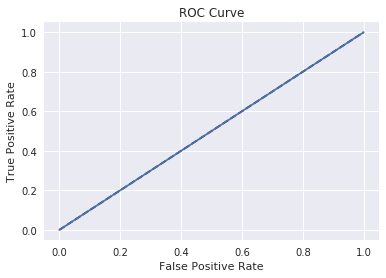

AUC using cross val: [ 0.99553571  0.99412456  0.96205357  0.97058824  1.          0.99221357
  0.99777531  0.995338    0.99642857  0.97685185]
Mean AUC score is: 0.98809093755


/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning:

Variables are collinear.

/opt/conda/lib/python3.6/site-packages/sklearn/discriminant_anal

In [19]:
# Generating the ROC curve
y_pred_proba = model_lda.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

# AUC score using cross validation
kfold_val = KFold(n_splits=num_folds, random_state=42)
auc_score = cross_val_score(model_lda, X_test, y_test, cv=kfold_val, scoring='roc_auc')
print("AUC using cross val: " + str(auc_score))
mean_auc = np.mean(auc_score)
print("Mean AUC score is: " + str(mean_auc))

In [20]:
# Scaling Random Forests

model_rf = RandomForestClassifier(n_estimators=1000)
model_rf.fit(rescaledX, y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model_rf.predict(rescaledValidationX)
print("accuracy score:")
print(accuracy_score(y_test, predictions))
print("confusion matrix: ")
print(confusion_matrix(y_test, predictions))
print("classification report: ")
print(classification_report(y_test, predictions))


accuracy score:
0.564489112228
confusion matrix: 
[[140 140]
 [120 197]]
classification report: 
             precision    recall  f1-score   support

          0       0.54      0.50      0.52       280
          1       0.58      0.62      0.60       317

avg / total       0.56      0.56      0.56       597



<div class="span5 alert alert-info">
<p>
<h3>5. Feature Importances:</h3>
<br/>    
Below you can find the feature with highest to least important features plotted in the graph.
<br/><br/>
This is for XGBoost.
</p></div>

In [21]:
features = merged_dataframe.drop(['Label'],axis=1).columns.values

x, y = (list(x) for x in zip(*sorted(zip(model_xgb.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for XGBoost',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for XGBoost',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')


<div class="span5 alert alert-info">
<p>
Below is the feature importance graph for Random Forests.
</p>
</div>

In [22]:
x, y = (list(x) for x in zip(*sorted(zip(model_rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Feature importance for Random Forests',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances for Random Forests',
     width = 1000, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')


<div class="span5 alert alert-info">
<p>
<h3>Fine Tuning XGBoost</h3>
<br>
As of now the model that seems to be performing the best is the XGBoost model.
<br/><br/>
Lets see if we can fine tune it further to increase the accuracy of the model.
</p></div>

In [23]:
# XGBoost on Stock Price dataset, Tune n_estimators and max_depth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib

matplotlib.use('Agg')
model = XGBClassifier()
n_estimators = [150, 200, 250, 450, 500, 550, 1000]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
print(max_depth)
best_depth = 0
best_estimator = 0
max_score = 0
for n in n_estimators:
    for md in max_depth:
        model = XGBClassifier(n_estimators=n, max_depth=md)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            best_depth = md
            best_estimator = n
        print("Score is " + str(score) + " at depth of " + str(md) + " and estimator " + str(n))
print("Best score is " + str(max_score) + " at depth of " + str(best_depth) + " and estimator of " + str(best_estimator))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/opt/conda/lib/python3.6/si

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Score is 0.571189279732 at depth of 1 and estimator 150
Score is 0.587939698492 at depth of 2 and estimator 150
Score is 0.587939698492 at depth of 3 and estimator 150
Score is 0.587939698492 at depth of 4 and estimator 150
Score is 0.582914572864 at depth of 5 and estimator 150
Score is 0.587939698492 at depth of 6 and estimator 150
Score is 0.592964824121 at depth of 7 and estimator 150
Score is 0.582914572864 at depth of 8 and estimator 150
Score is 0.579564489112 at depth of 9 and estimator 150
Score is 0.596314907873 at depth of 10 and estimator 150
Score is 0.592964824121 at depth of 11 and estimator 150
Score is 0.591289782245 at depth of 12 and estimator 150
Score is 0.577889447236 at depth of 1 and estimator 200
Score is 0.589614740369 at depth of 2 and estimator 200
Score is 0.591289782245 at depth of 3 and estimator 200
Score is 0.592964824121 at depth of 4 and estimator 200
Score is 0.579564489112 at depth of 5 and estimator 200
Score

<div class="span5 alert alert-info">
<h3> Fine tuning with important features:</h3>

In [24]:
imp_features_df = merged_dataframe[['Low', "Neutral", 'Close', 'Objectivity', 'Date']]
Xi_train, Xi_test = X.loc[0:train_size, :], X.loc[train_size: len(X.index), :]
clf = XGBClassifier(n_estimators=500, max_depth=3)
clf.fit(Xi_train, y_train)
yi_pred = clf.predict(Xi_test)
score = accuracy_score(y_test, yi_pred)
print("Score is "+ str(score))


Score is 0.616415410385


<div class="span5 alert alert-info">
<h3>PCA transformation:</h3>
    </div>

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
transformed = pca.transform(X)

transformed.shape
print(type(transformed))

<class 'numpy.ndarray'>


In [26]:
pca_df = pd.DataFrame(transformed)

X_train_pca, X_test_pca = pca_df.loc[0:train_size, :], pca_df.loc[train_size: len(X.index), :]

clf = XGBClassifier(n_estimators=500, max_depth=3)
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
score = accuracy_score(y_test, y_pred_pca)
print("Score is "+ str(score))


Score is 0.941373534338


In [27]:
pca_matrix = confusion_matrix(y_test, y_pred_pca)
pca_report = classification_report(y_test, y_pred_pca)
print("Confusion Matrix: \n" + str(pca_matrix))
print("Classification report: \n" + str(pca_report))

Confusion Matrix: 
[[258  22]
 [ 13 304]]
Classification report: 
             precision    recall  f1-score   support

          0       0.95      0.92      0.94       280
          1       0.93      0.96      0.95       317

avg / total       0.94      0.94      0.94       597



AUC score is 0.987730959892
roc auc is :0.987730959892


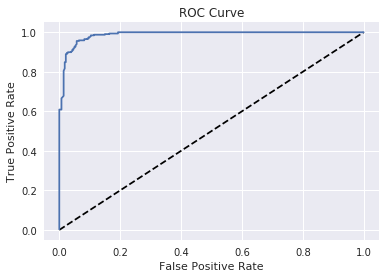

In [28]:
# Generating the ROC curve
y_pred_proba_pca = clf.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pca)
roc_auc = auc(fpr, tpr)
print("AUC score is " + str(roc_auc))

# Plot ROC curve
print("roc auc is :" + str(roc_auc))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()


<div class="span5 alert alert-info">
<p>
    <br/>
Now lets try and train our data using a TimeSeriesSplit which is specifically used for splitting the dataset to 
training and testing datasets.
<br/><br/>
By specifying the number of splits, we can split the data on a sample of 40%, 70% and 100% of the dataset.
<br/><br/>
The plots below shows the splits of the datasets and the respective number of samples in each split.
</p>
</div>

In [ ]:
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
print(splits.split(X))
for X_train_index, X_test_index in splits.split(X):
    X1_train = X.loc[X_train_index, :]
    X1_test = X.loc[X_test_index, :]
    print('Observations: %d' % (len(X1_train) + len(X1_test)))
    print('Training Observations: %d' % (len(X1_train)))
    print('Testing Observations: %d' % (len(X1_test)))
    pyplot.subplot(310 + index)
    pyplot.plot(X1_train['Objectivity'])
    pyplot.plot([None for i in X1_train['Objectivity']] + [x for x in X1_test['Objectivity']])
    index += 1
pyplot.show()

index = 1
#y = np.array(y)
y_ser = list(splits.split(y))
print(y_ser[0])
for y_train_index, y_test_index in y_ser:
    y1_train = y[y_train_index]
    y1_test = y[y_test_index]
    print('Observations: %d' % (len(y1_train) + len(y1_test)))
    print('Training Observations: %d' % (len(y1_train)))
    print('Testing Observations: %d' % (len(y1_test)))
    pyplot.subplot(310 + index)
    pyplot.plot(y1_train)
    pyplot.plot([None for i in y1_train] + [x for x in y1_test])
    index += 1
pyplot.show()


<div class="span5 alert alert-info">
<p>
Now, we will train our data on the new splits against all algorithms and check for accuracy.
<br/><br/>
We observe that all the algorithms are giving about 53% accuracy.
    </p></div>

In [ ]:
# Evaluate each algorithm for accuracy
results = []
names = []

for name, model in models:
    clf1 = model
    clf1.fit(X1_train, y1_train)
    y1_pred = clf.predict(X1_test)
    accu_score1 = accuracy_score(y1_test, y1_pred)
    print(name + ": " + str(accu_score))

In [ ]:
# prepare the model LDA
scaler1 = StandardScaler().fit(X1_train)
rescaledX1 = scaler1.transform(X1_train)
model_lda1 = LinearDiscriminantAnalysis()
model_lda1.fit(rescaledX1, y1_train)
# estimate accuracy on validation dataset
rescaledValidationX1 = scaler1.transform(X1_test)
predictions1 = model_lda1.predict(rescaledValidationX1)
print("accuracy score:")
print(accuracy_score(y1_test, predictions1))
print("confusion matrix: ")
print(confusion_matrix(y1_test, predictions1))
print("classification report: ")
print(classification_report(y1_test, predictions1))

<div class="span5 alert alert-info">
<p>
Lets scale our data using StandardScalar and see how the algorithm performs.
<br/><br/>
Scaling the data makes the accuracy increase to 57%. We can see the respective confusion matrix and accuracy scores below.
    </p></div>

In [ ]:
# prepare the model Random Forest
scaler_rf = StandardScaler().fit(X1_train)
rescaledX_rf = scaler_rf.transform(X1_train)
model_rf = RandomForestClassifier(n_estimators=500)
model_rf.fit(rescaledX_rf, y1_train)
# estimate accuracy on validation dataset
rescaledValidationX_rf = scaler_rf.transform(X1_test)
predictions_rf = model_rf.predict(rescaledValidationX_rf)
print("accuracy score:")
print(accuracy_score(y1_test, predictions_rf))
print("confusion matrix: ")
print(confusion_matrix(y1_test, predictions_rf))
print("classification report: ")
print(classification_report(y1_test, predictions_rf))

<div class="span5 alert alert-info">
<p>
Plotting the roc auc curve and calculating the score shows a score of 0.5
    </p></div>

In [ ]:
# Generating the ROC curve
y1_pred_proba = model_lda1.predict_proba(X1_test)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred_proba)
roc_auc1 = auc(fpr1, tpr1)

# Plot ROC curve
print("roc auc is :" + str(roc_auc1))
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr1, tpr1)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC Curve')
pyplot.show()

<div class="span5 alert alert-info">
<p>
<h2>ARIMA model:</h2>
<br/><br/>
Lets create an ARIMA model for our time series.
<br/><br/>
There are a certain checks that needs to be done before applying an ARIMA model on the dataset.
<br/><br/>
We need to check if there is a trend in our dataset. If there a trend, then we need to apply something called as differenciation to make our data stationary.
<br/><br/>
By plotting the outputs of the dataset, we see that there is a clear increasing trend.
<br/><br/>
This means we need to make our data stationary.
</p></div>

In [ ]:
pyplot.plot(merged_dataframe['Date'], merged_dataframe['Close'])
pyplot.xlabel('Years')
pyplot.ylabel('Stock Closing Prices')
pyplot.show()


In [ ]:
merged_dataframe.info()

<div class="span5 alert alert-info">
Lets make the 'Date' column as index.
<br/><br/>
Now, we will plot the Autocorrelation plot to see estimate lag in our data.
</div>

In [ ]:
merged_dataframe['Date'] = merged_dataframe['Date'].dt.strftime('%Y-%m')

In [ ]:
df_dateclose = pd.Series(merged_dataframe['Close'].values, index = merged_dataframe['Date'])
print(df_dateclose.index)
print(df_dateclose.head())
autocorrelation_plot(df_dateclose)
pyplot.show()

In [ ]:
merged_dataframe['Close'].head()

In [ ]:
plot_pacf(df_dateclose, lags=50)

In [ ]:
plot_acf(df_dateclose)

In [ ]:
plot_acf(df_dateclose, lags=50)

In [ ]:
arima_df = pd.DataFrame(merged_dataframe, index=merged_dataframe['Date'])

In [ ]:
arima_df.index

<div class="span5 alert alert-info">
<p>
Lets look at how our ARIMA model performs with different values of p,d,q
<br/><br/>
We will do this by looping over the combination of a different range of parameters and check which of the parameter have the least mean squared error.
    </p></div>

In [ ]:

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df_dateclose.values, p_values, d_values, q_values)

<div class="span5 alert alert-info">
<p>
Based on our code, we have found out that the ARIMA model is best when the parameters are 0,1,0 for p,d,q respectively.
<br/><br/>
The mean squared error of the model training is about 20000 which is considerably ok as we are dealing with a huge set of numbers.
</p></div>


In [ ]:
df_dateclose.values

<div class="span5 alert alert-info">
<p>
Now ,lets predict the values based on our the model we fit in the previous cell on the test set and plot a graph of the predicted and actual values.
<br/><br/>
We can observe below that the expected and predicted value are very close and it looks like for each of the samples, the previous expected value is much closer to the current predicted.
   <br/><br/>
 
The plot below shows the predicted and actual values in red and blue respectively.
<br/><br/>
Its very smooth and seems like the model is doing a good job, but it can definitely do better with a little bit of tweaking.
</p></div>

In [ ]:
X = df_dateclose.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()